In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA, KernelPCA

In [4]:
df = pd.read_csv('HousingPrices-Amsterdam.csv')
df

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [5]:
df.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [8]:
df.dropna(inplace=True)

In [9]:
df

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [10]:
df.drop('Unnamed: 0', axis='columns', inplace=True)


In [11]:
df.Zip.value_counts()

1075 XR    5
1017 KP    4
1060 SC    3
1095 MD    3
1060 RZ    3
          ..
1021 CK    1
1052 TV    1
1053 GB    1
1092 GA    1
1019 RS    1
Name: Zip, Length: 830, dtype: int64

In [12]:
df.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,5.950000e+06,623.000000,14.00000,5.029122,52.423805


In [13]:
df.groupby(by='Address').count()

,Zip,Price,Area,Room,Lon,Lat
Address,,,,,,
"'t Nopeind 2, Amsterdam",1,1,1,1,1,1
"1e Kekerstraat 119, Amsterdam",1,1,1,1,1,1
"1e Kekerstraat 77 PP, Amsterdam",1,1,1,1,1,1
"Aalbersestraat 232, Amsterdam",1,1,1,1,1,1
"Aalsmeerweg 112 II, Amsterdam",1,1,1,1,1,1
...,...,...,...,...,...,...
"Zuideinde 417, Amsterdam",1,1,1,1,1,1
"Zuidelijke Wandelweg 151 PP, Amsterdam",1,1,1,1,1,1
"Zuidelijke Wandelweg 151, Amsterdam",1,1,1,1,1,1


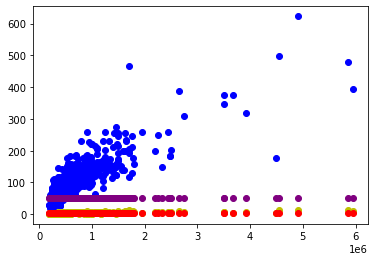

In [14]:
print(plt.scatter(df.Price, df.Area, color = 'b'))
print(plt.scatter(df.Price, df.Room, color = 'y'))
print(plt.scatter(df.Price, df.Lon, color = 'r'))
print(plt.scatter(df.Price, df.Lat, color = 'purple'))

In [15]:
df.Room.max()

14

In [22]:
df.corr()

,Price,Area,Room,Lon,Lat
Price,1.000000,0.835090,0.623448,-0.013561,0.062196
Area,0.835090,1.000000,0.808285,0.021762,0.014179
Room,0.623448,0.808285,1.000000,-0.025753,-0.021168
Lon,-0.013561,0.021762,-0.025753,1.000000,-0.183445
Lat,0.062196,0.014179,-0.021168,-0.183445,1.000000


In [27]:
corr_matrix = df.corr()
print(corr_matrix["Price"].sort_values(ascending=False))

Price    1.000000
Area     0.835090
Room     0.623448
Lat      0.062196
Lon     -0.013561
Name: Price, dtype: float64


In [48]:
x = df[['Area', 'Room', 'Lon', 'Lat']]
x 

,Area,Room
0,64,3
1,60,3
2,109,4
3,128,6
4,138,5
...,...,...
919,117,1
920,72,3
921,51,3
922,113,4


In [49]:
y = df.Price
y 

0      685000.0
1      475000.0
2      850000.0
3      580000.0
4      720000.0
         ...   
919    750000.0
920    350000.0
921    350000.0
922    599000.0
923    300000.0
Name: Price, Length: 920, dtype: float64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.8)


In [58]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [51]:
model.predict([[64, 3]])

array([364574.19102601])

In [52]:
model.predict([[200, 4]])

array([1545303.74088743])

In [53]:
model.coef_

array([  9056.90172562, -51009.08482338])

In [54]:
model.intercept_

-62040.26494376967

In [55]:
model.score(x,y)

0.705038950214665